<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-January/blob/main/KNN/KNN_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**KNN is a supervised machine learning algorithm.It can be used to classification of data set.Here The dataset contains the Age,salary and the decision to purchase a particular Car.We will be use kNN to predict if a particular person will buy a car.**

In [ ]:

import numpy as np 
import pandas as pd 



**1.Importing the Python Modules**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
plt.style.use('fivethirtyeight')

**2.Exploring the Data**

In [ ]:
dataset=pd.read_csv('/content/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


So we have the User ID, Gender,Age,Salary and the data if Purchase made by a used.

**Summary of Dataset**

In [ ]:
print('Rows     :',dataset.shape[0])
print('Columns  :',dataset.shape[1])
print('\nFeatures :\n     :',dataset.columns.tolist())
print('\nMissing values    :',dataset.isnull().values.sum())
print('\nUnique values :  \n',dataset.nunique())

Rows     : 400
Columns  : 5

Features :
     : ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

Missing values    : 0

Unique values :  
 User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


We can see that mean age is arounf 37 

Mean estimated salary is 69742 $

**Gender**

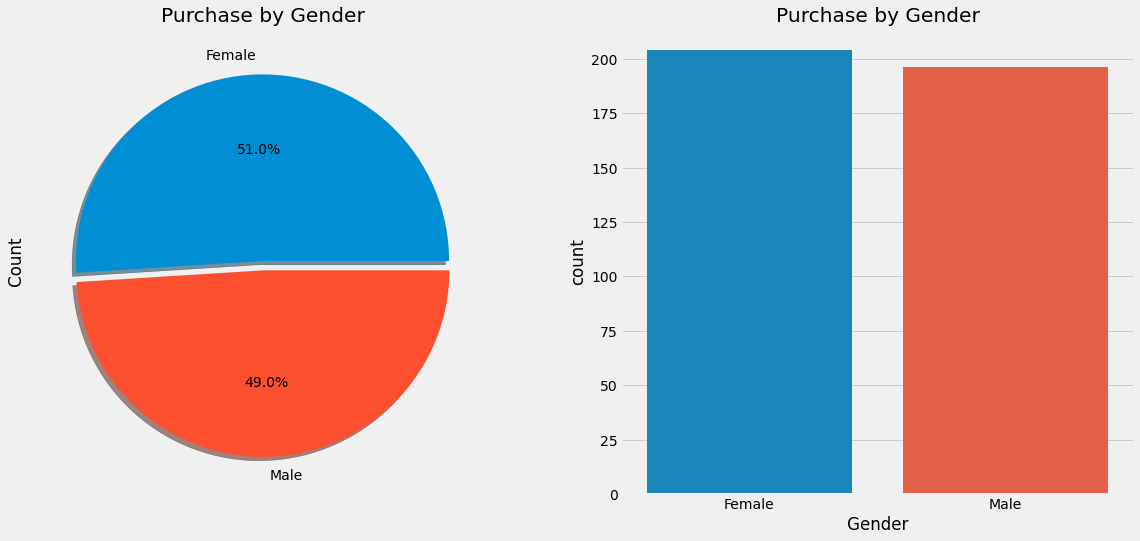

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Gender'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Purchase by Gender')
ax[0].set_ylabel('Count')
sns.countplot('Gender',data=dataset,ax=ax[1],order=dataset['Gender'].value_counts().index)
ax[1].set_title('Purchase by Gender')
plt.show()

Data is almost even between Male and Female with sligh inclination towards female

**Purchase Distribution**

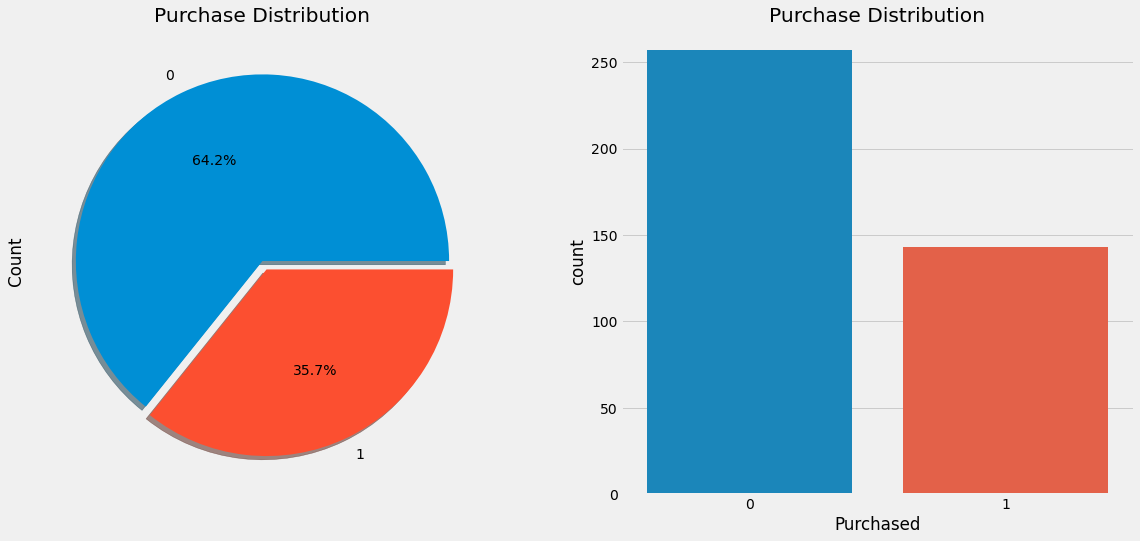

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Purchased'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Purchase Distribution')
ax[0].set_ylabel('Count')
sns.countplot('Purchased',data=dataset,ax=ax[1],order=dataset['Purchased'].value_counts().index)
ax[1].set_title('Purchase Distribution')
plt.show()

So Most people in the dataset have not brough the car.All our attempts should be towards selling more cars.

**Estimated Salary Distribution**

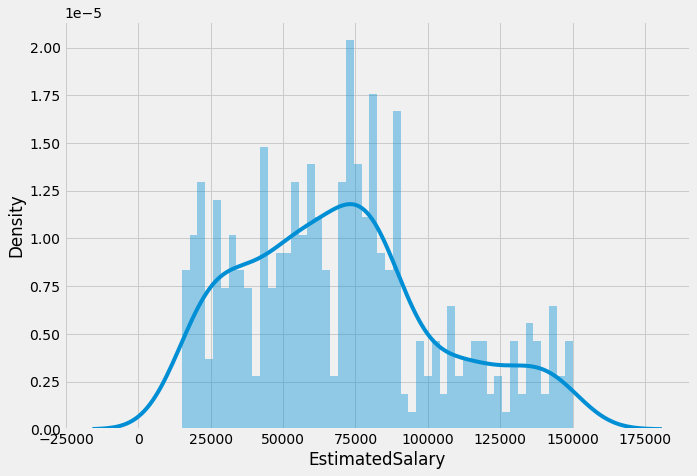

In [ ]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.distplot(dataset['EstimatedSalary'],kde=True,bins=50);

We can see like mean salary of the population is arond 75000 $. 

**3.Generating Array of Features and Target Values**

In [ ]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

**4.Splitting the dataset to Train and Test Set**

In [ ]:
from sklearn.model_selection import train_test_split   #cross_validation doesnt work any more
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 
X_train

**5.Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
# X_train

**6.Fitting K Neighbors into Training set**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

**7.Predicting the test set results**

In [ ]:
y_pred=classifier.predict(X_test)

**8.Making the confusion matrix**

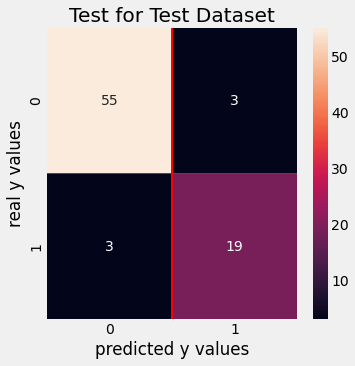

In [ ]:
#from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        58
           1       0.86      0.86      0.86        22

    accuracy                           0.93        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.93      0.93      0.93        80



In [ ]:
print(accuracy_score(y_test,y_pred))

0.925


Correct predictions =54+21=78

Wrong predictions =1+4=5

Accuracy = (78/83)*100 =93.97 %

**9.Visualizing the Training Set Results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


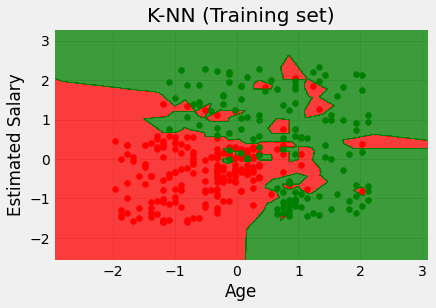

In [ ]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

**10.Visualizing the Test Set Results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


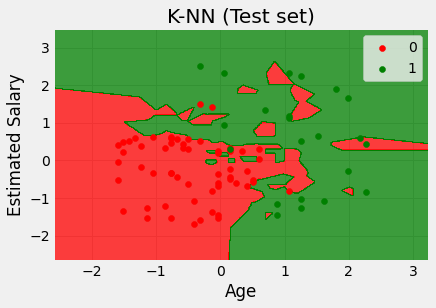

In [ ]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Red area represent the people who didnt buy the car.Green area represent people who brought the car.We can see that the accuracy level obtained is greater than thats we might have obtained by other Algorithms like Logistic Regression.

**How to decide Optimium Value of K?**

In [ ]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

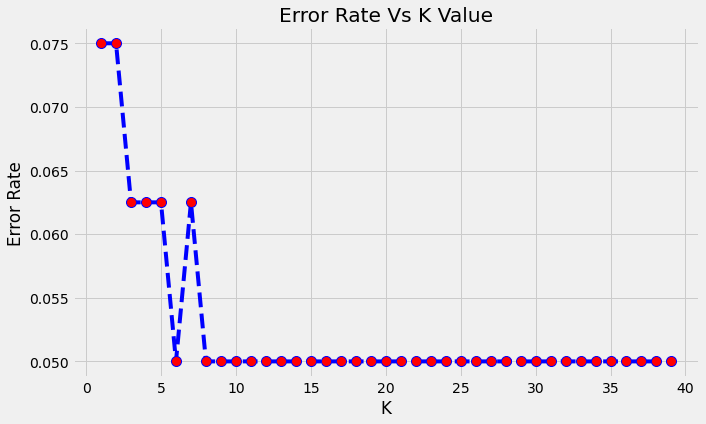

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

From the above plot we can see that lowest Error rate is when  K has a value of 5.Let us run model with K=5 and check the performace of the model

**Model with K=5**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=classifier.predict(X_test)

**Model Performance with K=5**

Confusion Matrix with K=5

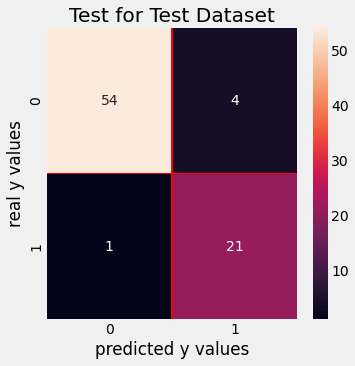

In [ ]:
#from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.84      0.95      0.89        22

    accuracy                           0.94        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.94      0.94        80



In [ ]:
print(accuracy_score(y_test,y_pred))

0.9375


So we can see that when we increased the K number from 1 to 5 the accuracy,Precision and Recall of the model have improved.